**Pooya Kabiri - 96521434**

### Importing prerequisites



In [23]:
import os
import cv2
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Uploading the kaggle.json file

In [2]:
!rm -rf sample_data

In [3]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pooyakabiri","key":"d6afbeb370ee08af651c1177181030ee"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


### Downloading dataset

In [5]:
os.chdir('/content/')
os.makedirs('stanford_car_dataset')
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder  -p /content/

100% 1.82G/1.83G [00:15<00:00, 215MB/s]
100% 1.83G/1.83G [00:15<00:00, 124MB/s]


### Unzipping dataset

In [6]:
!mv '/content/stanford-car-dataset-by-classes-folder.zip' '/content/stanford_car_dataset/'

In [ ]:
os.chdir('/content/stanford_car_dataset')
!unzip '/content/stanford_car_dataset/stanford-car-dataset-by-classes-folder.zip'

### Setting Hyperparameters


In [8]:
IMG_WIDTH, IMG_HEIGHT, CHANNELS = 224, 224, 3
BATCH_SIZE = 96
n_classes = 196

In [39]:
BASE_PATH = '/content/stanford_car_dataset'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'car_data/car_data/train')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'car_data/car_data/test')

### Example of dataset

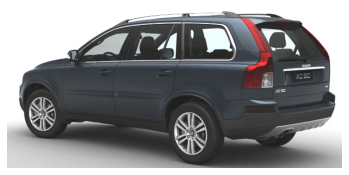

In [60]:
image = mpimg.imread(os.path.join(DATA_TRAIN_PATH, 'Volvo XC90 SUV 2007/00954.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

### Creating the generators

In this step, we will use the Keras `ImageDataGenerator` methods for loading and transform the images of the dataset. With these methods, we don't need to load the entire image dataset in memory.

In [41]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_datagen_aug = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    preprocessing_function = preprocess_input
    )

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical')
train_generator_aug  = train_datagen_aug.flow_from_directory(DATA_TRAIN_PATH, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical')
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH, target_size=(IMG_WIDTH, IMG_HEIGHT), batch_size=BATCH_SIZE, class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


### ResNet50 without Data Augmentation

In [43]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet50V2

In [44]:
def build_model():

    Backbone = ResNet50V2(
    include_top=True, weights=None, pooling='avg', classes=n_classes, input_tensor=None,
    input_shape=None)

    return Backbone

In [46]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'Nadam'
model.compile(loss=loss , optimizer= optimizer, metrics=['accuracy'])

In [48]:
model.fit(train_generator, epochs=30, batch_size=BATCH_SIZE)

Epoch 1/30
85/85 [==============================] - 84s 848ms/step - loss: 5.4693 - accuracy: 0.0075
Epoch 2/30
85/85 [==============================] - 72s 843ms/step - loss: 5.0998 - accuracy: 0.0135
Epoch 3/30
85/85 [==============================] - 72s 844ms/step - loss: 4.9166 - accuracy: 0.0250
Epoch 4/30
85/85 [==============================] - 72s 841ms/step - loss: 4.6526 - accuracy: 0.0486
Epoch 5/30
85/85 [==============================] - 72s 844ms/step - loss: 4.3524 - accuracy: 0.0769
Epoch 6/30
85/85 [==============================] - 72s 846ms/step - loss: 4.0884 - accuracy: 0.0880
Epoch 7/30
85/85 [==============================] - 72s 841ms/step - loss: 3.6862 - accuracy: 0.1432
Epoch 8/30
85/85 [==============================] - 72s 839ms/step - loss: 3.2513 - accuracy: 0.2116
Epoch 9/30
85/85 [==============================] - 72s 844ms/step - loss: 2.8398 - accuracy: 0.2857
Epoch 10/30
85/85 [==============================] - 73s 855ms/step - loss: 2.3131 - accura

In [49]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

84/84 [==============================] - 71s 830ms/step - loss: 4.2997 - accuracy: 0.2710


[4.299706935882568, 0.2709861993789673]

**As seen,** the model overfits the data extremeley, because the model has a lot more capacity and complexity in contrast to the data.

### ResNet50 with Data Augmentation

In [52]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'Nadam'
model.compile(loss=loss , optimizer= optimizer, metrics=['accuracy'])

In [53]:
model.fit(train_generator_aug, epochs=50, batch_size=BATCH_SIZE)

Epoch 1/50
85/85 [==============================] - 162s 2s/step - loss: 5.4793 - accuracy: 0.0089
Epoch 2/50
85/85 [==============================] - 149s 2s/step - loss: 5.1300 - accuracy: 0.0167
Epoch 3/50
85/85 [==============================] - 147s 2s/step - loss: 4.9948 - accuracy: 0.0253
Epoch 4/50
85/85 [==============================] - 148s 2s/step - loss: 4.8958 - accuracy: 0.0347
Epoch 5/50
85/85 [==============================] - 145s 2s/step - loss: 4.7394 - accuracy: 0.0435
Epoch 6/50
85/85 [==============================] - 146s 2s/step - loss: 4.6122 - accuracy: 0.0581
Epoch 7/50
85/85 [==============================] - 145s 2s/step - loss: 4.4747 - accuracy: 0.0645
Epoch 8/50
85/85 [==============================] - 145s 2s/step - loss: 4.3337 - accuracy: 0.0765
Epoch 9/50
85/85 [==============================] - 147s 2s/step - loss: 4.2223 - accuracy: 0.0901
Epoch 10/50
85/85 [==============================] - 148s 2s/step - loss: 4.0963 - accuracy: 0.1069
Epoch 11/

In [54]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

84/84 [==============================] - 68s 800ms/step - loss: 3.0274 - accuracy: 0.4679


[3.027381420135498, 0.46785226464271545]

**As seen,** the model overfits the data again, but using data augmentation techniques help the model to reduce overfit and causes the model to have a better generalization over the data, so the performance of the model is significantly improved (about 18%).

### ResNet50 on ImageNet with Data Augmentation

In [56]:
def build_model_with_resnet50(freeze_wights=False):

    Backbone = ResNet50(
    include_top=False, weights='imagenet', pooling='avg')

    if freeze_wights:
        Backbone.trainable = False
        for layer in Backbone.layers:
            if "BatchNormalization" in layer.__class__.__name__:
                layer.trainable = True
            else:
                layer.trainable = False
    else:
        Backbone.trainable = True

    X = BatchNormalization()(Backbone.output)

    X = Flatten(name="flatten")(X)
    
    X = Dense(1024)(X)
    X = Activation('relu')(X) 

    X = BatchNormalization()(X)

    X = Dense(n_classes)(X)
    X = Activation('softmax')(X)

    model = Model(Backbone.input, X)

    return model

#### Fine-Tuning

In [57]:
model = build_model_with_resnet50()
loss = 'categorical_crossentropy'
optimizer = Adam(lr=1e-4)
model.compile(loss=loss , optimizer= optimizer, metrics=['accuracy'])

94773248/94765736 [==============================] - 1s 0us/step


In [58]:
model.fit(train_generator_aug, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
85/85 [==============================] - 149s 2s/step - loss: 5.6177 - accuracy: 0.0251
Epoch 2/15
85/85 [==============================] - 146s 2s/step - loss: 3.3383 - accuracy: 0.2735
Epoch 3/15
85/85 [==============================] - 143s 2s/step - loss: 1.9013 - accuracy: 0.5727
Epoch 4/15
85/85 [==============================] - 141s 2s/step - loss: 1.1656 - accuracy: 0.7448
Epoch 5/15
85/85 [==============================] - 141s 2s/step - loss: 0.7599 - accuracy: 0.8426
Epoch 6/15
85/85 [==============================] - 144s 2s/step - loss: 0.4954 - accuracy: 0.9079
Epoch 7/15
85/85 [==============================] - 153s 2s/step - loss: 0.3467 - accuracy: 0.9384
Epoch 8/15
85/85 [==============================] - 150s 2s/step - loss: 0.2462 - accuracy: 0.9588
Epoch 9/15
85/85 [==============================] - 143s 2s/step - loss: 0.1708 - accuracy: 0.9745
Epoch 10/15
85/85 [==============================] - 152s 2s/step - loss: 0.1383 - accuracy: 0.9834
Epoch 11/

In [59]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

84/84 [==============================] - 69s 803ms/step - loss: 1.0913 - accuracy: 0.7278


[1.0912830829620361, 0.7277701497077942]

**The** results have improved in a noticable way, because of the transfer learning procedur on ResNet50 and using it's learned features on ImageNet and then fine tuning the network on out cars data.

#### With frozen weights


In [64]:
model = build_model_with_resnet50(freeze_wights=True)
loss = 'categorical_crossentropy'
optimizer = Adam(lr=1e-4)
model.compile(loss=loss , optimizer= optimizer, metrics=['accuracy'])

In [65]:
model.fit(train_generator_aug, epochs=50, batch_size=BATCH_SIZE)

Epoch 1/50
85/85 [==============================] - 151s 2s/step - loss: 5.8435 - accuracy: 0.0137
Epoch 2/50
85/85 [==============================] - 149s 2s/step - loss: 4.7274 - accuracy: 0.0731
Epoch 3/50
85/85 [==============================] - 148s 2s/step - loss: 4.0587 - accuracy: 0.1548
Epoch 4/50
85/85 [==============================] - 150s 2s/step - loss: 3.5542 - accuracy: 0.2478
Epoch 5/50
85/85 [==============================] - 152s 2s/step - loss: 3.1616 - accuracy: 0.3105
Epoch 6/50
85/85 [==============================] - 154s 2s/step - loss: 2.8584 - accuracy: 0.3659
Epoch 7/50
85/85 [==============================] - 155s 2s/step - loss: 2.5308 - accuracy: 0.4294
Epoch 8/50
85/85 [==============================] - 157s 2s/step - loss: 2.3075 - accuracy: 0.4851
Epoch 9/50
85/85 [==============================] - 148s 2s/step - loss: 2.1299 - accuracy: 0.5225
Epoch 10/50
85/85 [==============================] - 146s 2s/step - loss: 1.9845 - accuracy: 0.5617
Epoch 11/

In [66]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

84/84 [==============================] - 69s 810ms/step - loss: 2.0442 - accuracy: 0.5098


[2.044236421585083, 0.5097624659538269]